In [3]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install opencv-python

  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install imutils

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25854 sha256=08522a1b10f8dc293dd029bab5e66e36ee295693107f55cd67dfc6fea097cecb
  Stored in directory: c:\users\devik_k\appdata\local\pip\cache\wheels\c2\02\32\f3617a9f68bcc67eda3ebeb4514eba18f62e81ff439428109d
Successfully built imutils
Note: you may need to restart the kernel to use updated packages.


In [10]:
import os
import random
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from matplotlib.pyplot import imshow
import matplotlib.cm as cm
import matplotlib.pylab as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import PIL
from PIL import ImageFilter
import cv2
import itertools
import random
import keras
import imutils
from imutils import paths


In [11]:
from keras import optimizers
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras import callbacks
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D , UpSampling2D ,Conv2DTranspose
from keras import backend as K

%matplotlib inline

In [12]:
def pil_image(img_path):
    pil_im =PIL.Image.open(img_path).convert('L')
    pil_im=pil_im.resize((105,105))
    #imshow(np.asarray(pil_im))
    return pil_im

In [13]:
def noise_image(pil_im):
    # Adding Noise to image
    img_array = np.asarray(pil_im)
    mean = 0.0   # some constant
    std = 5   # some constant (standard deviation)
    noisy_img = img_array + np.random.normal(mean, std, img_array.shape)
    noisy_img_clipped = np.clip(noisy_img, 0, 255)
    noise_img = PIL.Image.fromarray(np.uint8(noisy_img_clipped)) # output
    #imshow((noisy_img_clipped ).astype(np.uint8))
    noise_img=noise_img.resize((105,105))
    return noise_img

def blur_image(pil_im):
    #Adding Blur to image
    blur_img = pil_im.filter(ImageFilter.GaussianBlur(radius=3)) # ouput
    #imshow(blur_img)
    blur_img=blur_img.resize((105,105))
    return blur_img

def affine_rotation(img):

    #img=cv2.imread(img_path,0)
    rows, columns = img.shape

    point1 = np.float32([[10, 10], [30, 10], [10, 30]])
    point2 = np.float32([[20, 15], [40, 10], [20, 40]])

    A = cv2.getAffineTransform(point1, point2)

    output = cv2.warpAffine(img, A, (columns, rows))
    affine_img = PIL.Image.fromarray(np.uint8(output)) # affine rotated output
    #imshow(output)
    affine_img=affine_img.resize((105,105))
    return affine_img


def gradient_fill(image):
    #image=cv2.imread(img_path,0)
    laplacian = cv2.Laplacian(image,cv2.CV_64F)
    laplacian = cv2.resize(laplacian, (105, 105))
    return laplacian

In [65]:
data_path = "Documents//font_patch//"
data=[]
labels=[]
imagePaths = sorted(list(paths.list_images(data_path)))
random.seed(42)
random.shuffle(imagePaths)

In [66]:
data = []
labels = []

def conv_label(label):
    if 'Lato' in label:
        return 0
    elif 'Raleway' in label:
        return 1
    elif 'Roboto' in label:
        return 2
    elif 'Sansation' in label:
        return 3
    elif 'Walkway' in label:
        return 4
    
augument=["blur","noise","affine","gradient"]
a=itertools.combinations(augument, 4)

for i in list(a):
    print(list(i))

counter=0
for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    
    label = conv_label(label)
    pil_img = pil_image(imagePath)
    #imshow(pil_img)

    # Adding original image
    org_img = img_to_array(pil_img)
    #print(org_img.shape)
    data.append(org_img)
    labels.append(label)

    augument=["noise","blur","affine","gradient"]
    for l in range(0,len(augument)):

        a=itertools.combinations(augument, l+1)

        for i in list(a):
            combinations=list(i)
            #print(len(combinations))
            temp_img = pil_img
            for j in combinations:

                if j == 'noise':
                    # Adding Noise image
                    temp_img = noise_image(temp_img)

                elif j == 'blur':
                    # Adding Blur image
                    temp_img = blur_image(temp_img)
                    #imshow(blur_img)


                elif j == 'affine':
                    open_cv_affine = np.array(pil_img)
                    # Adding affine rotation image
                    temp_img = affine_rotation(open_cv_affine)

                elif j == 'gradient':
                    open_cv_gradient = np.array(pil_img)
                    # Adding gradient image
                    temp_img = gradient_fill(open_cv_gradient)

            temp_img = img_to_array(temp_img)
            data.append(temp_img)
            labels.append(label)
print(labels)

['blur', 'noise', 'affine', 'gradient']
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [67]:
data = np.asarray(data, dtype="float") / 255.0
labels = np.array(labels)
print("Success")

Success


In [68]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.25, random_state=42)



[1 2 2 0 4 0 3 4 0 1 2 1 0 4 0 2 4 1 2 2 0 1 4 0 1 1 0 4 4 0 2 0 0 4 0 3 3
 0 0 2 0 4 0 1 4 1 3 0 3 4 1 4 0 3 2 0 1 2 1 1 4 2 2 1 0 2 0 4 0 4 2 0 2 0
 0 0 0 0 1 0 2 0 0 2 0 2 0 0 0 0 1 1 4 2 1 3 0 1 1 2 1 0 1 0 3 3 2 0 1 3 3
 1 0 4 4 0 1 3 4 3 2 0 0 0 3 3 4 0 0 1 1 0 0 4 1 3 1 1 1 2 0 2 0 3 3 0 0 1
 2 1 1 1 0 0 4 0 3 0 2 0 0 0 1 0 0 2 0 1 0 0 1 0 0 0 2 2 1 2 2 0 1 1 1 0 1
 0 2 0 0 4 0 3 0 0 1 0 1 1 1 0 2 4 0 3 4 1 0 0 2 1 4 0 2 0 1 1 2 0 1 0 0 0
 2 0 0 0 1 0 0 1 0 2 4 0 3 0 2 3 0 4 3 2 1 4 2 1 4 3 3 1 0 4 4 4 0 0 0 0 0
 3 3 4 4 0 2 0 0 3 1 0 1 1 0 2 0 4 0 1 2 0 4 3 1 4 0 1 1 2 1 2 0 2 4 2 2 3
 3 0 1 2 0 3 3 0 2 1 4 0 1 1 2 3 0 0 2 1 0 2 0 1 3 0 0 0 2 0 2 4 4 1 4 1 2
 0 3 2 3 0 0 0 1 0 1 4 0 4 0 2 0 1 4 0 0 1 0 0 4 4 0 0 2 0 2 3 0 0 0 0 3 3
 0 0 1 1 1 0 4 0 3 0 0 3 0 0 0 2 1 0 1 1 1 0 0 2 1 4 4 4 0 2 0 2 0 3 0 2 4
 2 1 1 4 0 0 0 0 4 1 4 2 1 2 4 2 2 4 2 2 0 1 0 0 4 1 1 1 0 0 0 0 1 4 3 2 4
 2 2 1 4 3 1 2 2 3 2 1 4 4 4 0 0 3 0 3 0 2 2 0 2]


In [69]:
# convert the labels from integers to vectors
trainY = to_categorical(trainY, num_classes=5)
testY = to_categorical(testY, num_classes=5)

In [70]:
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,horizontal_flip=True)

In [81]:
pip install keras==1.2.2

     -------------------------------------- 175.5/175.5 kB 1.2 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 2.8/2.8 MB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for keras: filename=Keras-1.2.2-py3-none-any.whl size=209595 sha256=b5460fef85cabefe1f46a758685d7232ac07209d23ae1908c6f72b722f66f29b
  Stored in directory: c:\users\devik_k\appdata\local\pip\cache\wheels\af\4f\6e\4726782cbdcb69a00ad1100040d0fe4664e5444f806dfad2bd
  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668148 sha256=e29ec848da91cd052f7d9bdc93b6e2c0658c043a0852b022cff163e14eafb04d
  Stored in directory: c:\users\devik_k\appdata\local\pip\cache\wheels\2f\8b\77\45db6f8ec9086bcb5590b700fd458d4d63395433459acc3cd4
Successfully built keras theano
  Attempting uninstall: keras
    Found exi

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.16.1 requires keras>=3.0.0, but you have keras 1.2.2 which is incompatible.


In [93]:
from keras import backend as K


K.image_data_format()
#K.set_image_dim_ordering('tf')
#K.image_dim_ordering()

'channels_last'

In [99]:
def create_model():
    model=Sequential()

    # Cu Layers
    model.add(Conv2D(64, kernel_size=(48, 48), activation='relu', input_shape=(105,105,1)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, kernel_size=(24, 24), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2DTranspose(128, (24,24), strides = (2,2), activation = 'relu', padding='same', kernel_initializer='uniform'))
    model.add(UpSampling2D(size=(2, 2)))

    model.add(Conv2DTranspose(64, (12,12), strides = (2,2), activation = 'relu', padding='same', kernel_initializer='uniform'))
    model.add(UpSampling2D(size=(2, 2)))

    #Cs Layers
    model.add(Conv2D(256, kernel_size=(12, 12), activation='relu'))

    model.add(Conv2D(256, kernel_size=(12, 12), activation='relu'))

    model.add(Conv2D(256, kernel_size=(12, 12), activation='relu'))

    model.add(Flatten())

    model.add(Dense(4096, activation='relu'))

    model.add(Dropout(0.5))

    model.add(Dense(4096,activation='relu'))

    model.add(Dropout(0.5))

    model.add(Dense(2383,activation='relu'))

    model.add(Dense(5, activation='softmax'))
    
    return model
    

In [110]:
batch_size = 128
epochs = 10
model= create_model()

In [111]:
learning_rate = 0.001
momentum = 0.9
nesterov = True
optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum, nesterov=nesterov)
#model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])

In [112]:
early_stopping=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='min')

filepath = "top_model.keras"

checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [early_stopping,checkpoint]

In [114]:
model.fit(trainX, trainY,shuffle=True,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(testX, testY),callbacks=callbacks_list)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 104s/step - accuracy: 0.2126 - loss: 0.1597  
Epoch 1: val_loss improved from inf to 0.15976, saving model to top_model.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 511s 129s/step - accuracy: 0.2141 - loss: 0.1597 - val_accuracy: 0.2372 - val_loss: 0.1598
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 117s/step - accuracy: 0.3494 - loss: 0.1528  
Epoch 2: val_loss improved from 0.15976 to 0.15956, saving model to top_model.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 571s 143s/step - accuracy: 0.3517 - loss: 0.1526 - val_accuracy: 0.4167 - val_loss: 0.1596
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 112s/step - accuracy: 0.4053 - loss: 0.1459  
Epoch 3: val_loss improved from 0.15956 to 0.15944, saving model to top_model.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 550s 141s/step - accuracy: 0.4050 - loss: 0.1458 - val_accuracy: 0.4167 - val_loss: 0.1594
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 90s/step - accuracy: 0.3859 - loss: 0.1420   
Epoch 4: val_loss improved from 0.15944 to 0.15937, saving model

In [115]:
score = model.evaluate(testX, testY, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.15873253345489502
Test accuracy: 0.4166666567325592


In [116]:
from keras.models import load_model
model = load_model('top_model.keras')

In [119]:
def blur_image(pil_im):
    #Adding Blur to image
    blur_img = pil_im.filter(ImageFilter.GaussianBlur(radius=3)) # ouput
    #imshow(blur_img)
    blur_img=blur_img.resize((105,105))
    return blur_img

img_path="Documents/sample.jpg"
pil_im =PIL.Image.open(img_path).convert('L')
pil_im=blur_image(pil_im)
org_img = img_to_array(pil_im)

In [120]:
def rev_conv_label(label):
    if label == 0 :
        return 'Lato'
    elif label == 1:
        return 'Raleway'
    elif label == 2 :
        return 'Roboto'
    elif label == 3 :
        return 'Sansation'
    elif label == 4:
        return 'Walkway'
    
data=[]
data.append(org_img)
data = np.asarray(data, dtype="float") / 255.0

In [123]:
y = model.predict(data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step
[[0.20809099 0.20325409 0.20377408 0.1910773  0.19380356]]


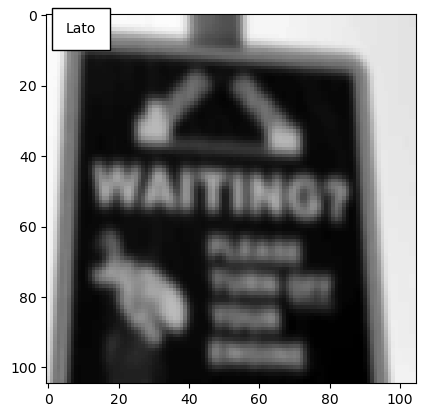

In [125]:
label = rev_conv_label(int(y[0][0]))
fig, ax = plt.subplots(1)
ax.imshow(pil_im, interpolation='nearest', cmap=cm.gray)
ax.text(5, 5, label , bbox={'facecolor': 'white', 'pad': 10})
plt.show()